# Dependence of $\kappa_\nu$ on sinking / upwelling

Nikurashin and Vallis (2012) presents a theoretical model to connect the meridional overturning circulation (AMOC) and deep stratification with the circumpolar channel at high latitudes (ACC). Equation 4.4 from the article demonstrates:

$$
\begin{aligned}
\frac{\Delta b h^2}{f_3} - \left(\frac{\tau_0}{\rho_0f_1} - K_e\frac{h}{l_s}\right){L_x} = \frac{\kappa_\nu}{h} L_xL_y
\end{aligned}
$$

The three terms, denoted by $\Psi_3, \Psi_1, \Psi_2$ respectively, in the above equation represent:

$$
\begin{aligned}
\Psi_3 &:= \text{deep water formation  in the Northern hemisphere}\\
\Psi_1 &:= \text{residual circulation as a difference of wind driven (Ekman) and eddy-induced transport in the Southern ocean}\\
\Psi_2 &:= \text{mixing driven upwelling in the ocean basin}
\end{aligned}
$$

## Estimate for the latitude ($\kappa_\nu$) for which southern sinking starts

For this case we start by assuming that Ekman and eddy transports are equal implying, $\Psi_1 \approx 0$ and $\Psi_3 = \Psi_2$. From the latter, an expression for $\kappa_\nu$ would look like:

$$\kappa_\nu = \frac{\Delta b h^3}{f_3} \frac{1}{L_xL_y}$$

Nikurashin and Vallis (2012) provides values for the parameters on the RHS, except for $h$, the depth of mid-depth cell of the AMOC. We can find it by rearranging $\Psi_1 \approx 0$ which yields

$$
\begin{aligned}
\left(\frac{\tau_0}{\rho_0f_1} - K_e\frac{h}{l_s}\right) &= 0 \\
h&=\frac{\tau_0}{\rho_0f_1} \frac{l_s}{K_e}
\end{aligned}
$$

In [1]:
Ke = 1e3  # m^2s^-1
tau0 = 0.2  # Nm^-2
rho0 = 1e3  # kgm^-3
f1 = f3 = 1e-4  # s^-1
Lx = 5_000 * 1e3  # m
Ly = 10_000 * 1e3  # m
ls = 1_000 * 1e3  # m
Deltab = 1e-2  # ms^-1

In [2]:
h = tau0 * Lx / (rho0 * f1 * Ke)
print(f"h = {h} m")

h = 10000.0 m


In [3]:
Kv = Deltab * h ** 3 / (f3 * Lx * Ly)
print(f"Kv = {Kv} m^2s^-1")

Kv = 2.0 m^2s^-1


## Dependence of northern sinking ($\Psi_N = \Psi_3$) and southern upwelling / sinking ($\Psi_S = \Psi_2$) on $\kappa_\nu$

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def PsiN(h):
    """Compute northern sinking."""
    return Deltab * h ** 2 / f3

def PsiS(h, Kv):
    """Compute southern upwelling / sinking."""
    return Kv * Lx * Ly / h

### Weak diffusivity limit

In this limit the residual circulation balances the northern deep-water formation ($\Psi_3 \approx \Psi_1$). Assuming that the Ekman transport dominates over eddy transport in the expression for $\Psi_1$,

$$
\begin{aligned}
\frac{\Delta b h^2}{f_3} = \left(\frac{\tau_0}{\rho_0f_1} \right){L_x}
\end{aligned}
$$

this limit arrives at equation 4.7 which says:

$$ h = \left(\frac{\tau_0 f_3 L_x}{\rho_0f_1\Delta b}\right)^{1/2} $$

Here, the depth of the MOC cell $h$ is independent of the diffusivity.

Assuming $\kappa_\nu \approx 10^{-5}$

In [5]:
def h_weak():
    return ((tau0*f3*Lx) / (rho0 * f1 * Deltab)) ** 0.5

h = h_weak()
print(f"h = {h} m")

h = 316.22776601683796 m


In [6]:
Psi = PsiN(h)
print(f"Psi_N = {Psi / 1e6} Sv")

Psi_N = 10.0 Sv


In [7]:
Psi = PsiS(h, Kv=1e-5)
print(f"Psi_S = {Psi / 1e6} Sv")

Psi_S = 1.5811388300841898 Sv


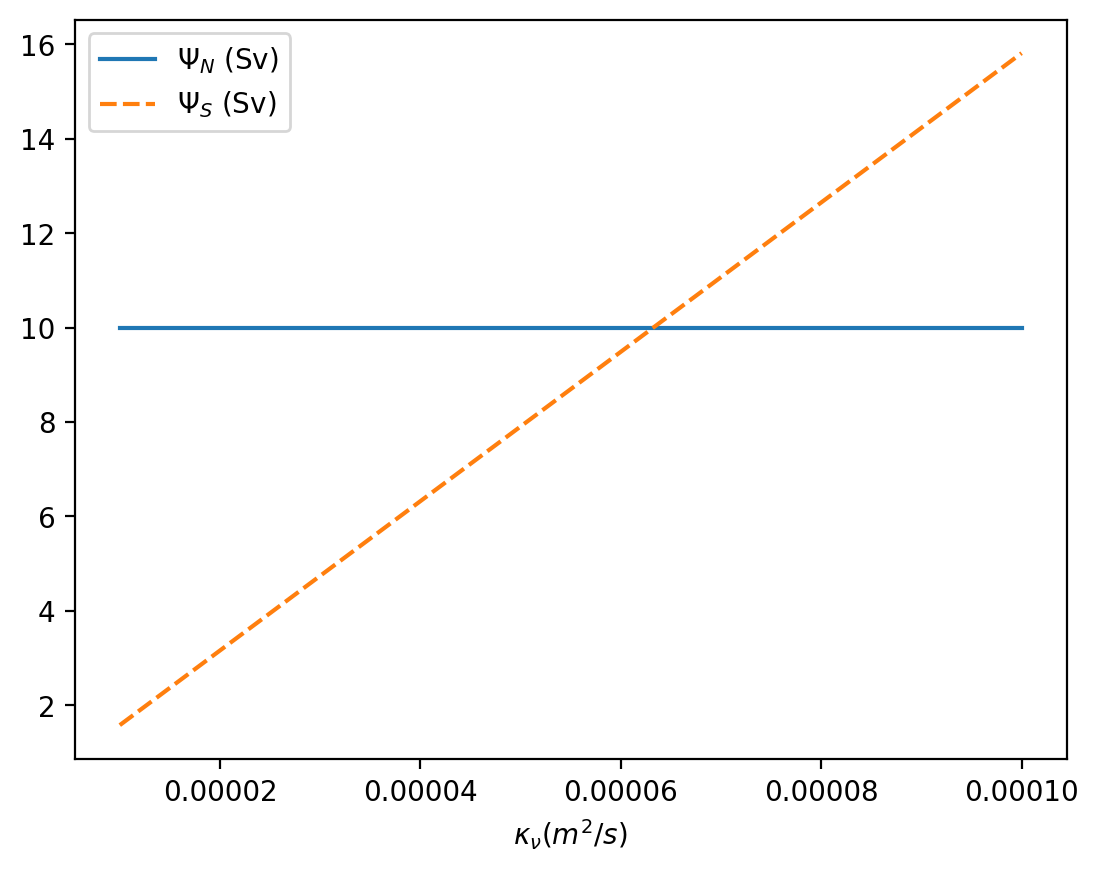

In [8]:
Kvs = np.geomspace(1e-5, 1e-4)
hs = np.ones_like(Kvs) * h_weak()
data = pd.DataFrame.from_dict(
    {
        r"$\kappa_\nu(m^2/s)$": Kvs,
        r"$\Psi_N$ (Sv)": PsiN(hs) / 1e6,
        r"$\Psi_S$ (Sv)": PsiS(hs, Kvs) / 1e6,
    }
)
data.set_index(data.columns[0], inplace=True)
sns.lineplot(data=data)

### Strong diffusivity limit

##### In this limit the mixing driven upwelling balances the northern deep-water formation ($\Psi_3 \approx \Psi_2$).

$$
\begin{aligned}
\frac{\Delta b h^2}{f_3} = \frac{\kappa_\nu}{h} L_xL_y
\end{aligned}
$$

This limit arrives at equation 4.12 which says:

$$ h = \kappa_\nu^{1/3} \left(\frac{f_3}{\Delta b}\right) ^{1/3} (L_x L_y)^{1/3} $$

Assuming $\kappa_\nu \approx 10^{-5}$

In [9]:
Kv = 1e-5

def h_strong(Kv):
    return Kv**(1/3) * (f3 / Deltab * Lx * Ly)**(1/3)

h = h_strong(Kv)
print(f"h = {h} m")

h = 170.99759466766966 m


In [10]:
Psi = PsiN(h)
print(f"Psi_N = {Psi / 1e6} Sv")

Psi_N = 2.9240177382128647 Sv


In [11]:
Psi = PsiS(h, Kv)
print(f"Psi_S = {Psi / 1e6} Sv")

Psi_S = 2.9240177382128674 Sv


Assuming $\kappa_\nu \approx 10^{-2}$

In [12]:
Kv = 0.01

def h_strong(Kv):
    return Kv**(1/3) * (f3 / Deltab * Lx * Ly)**(1/3)

h = h_strong(Kv)
print(f"h = {h} m")

h = 1709.9759466766964 m


In [13]:
Psi = PsiN(h)
print(f"Psi_N = {Psi / 1e6} Sv")

Psi_N = 292.4017738212864 Sv


In [14]:
Psi = PsiS(h, Kv)
print(f"Psi_S = {Psi / 1e6} Sv")

Psi_S = 292.4017738212867 Sv


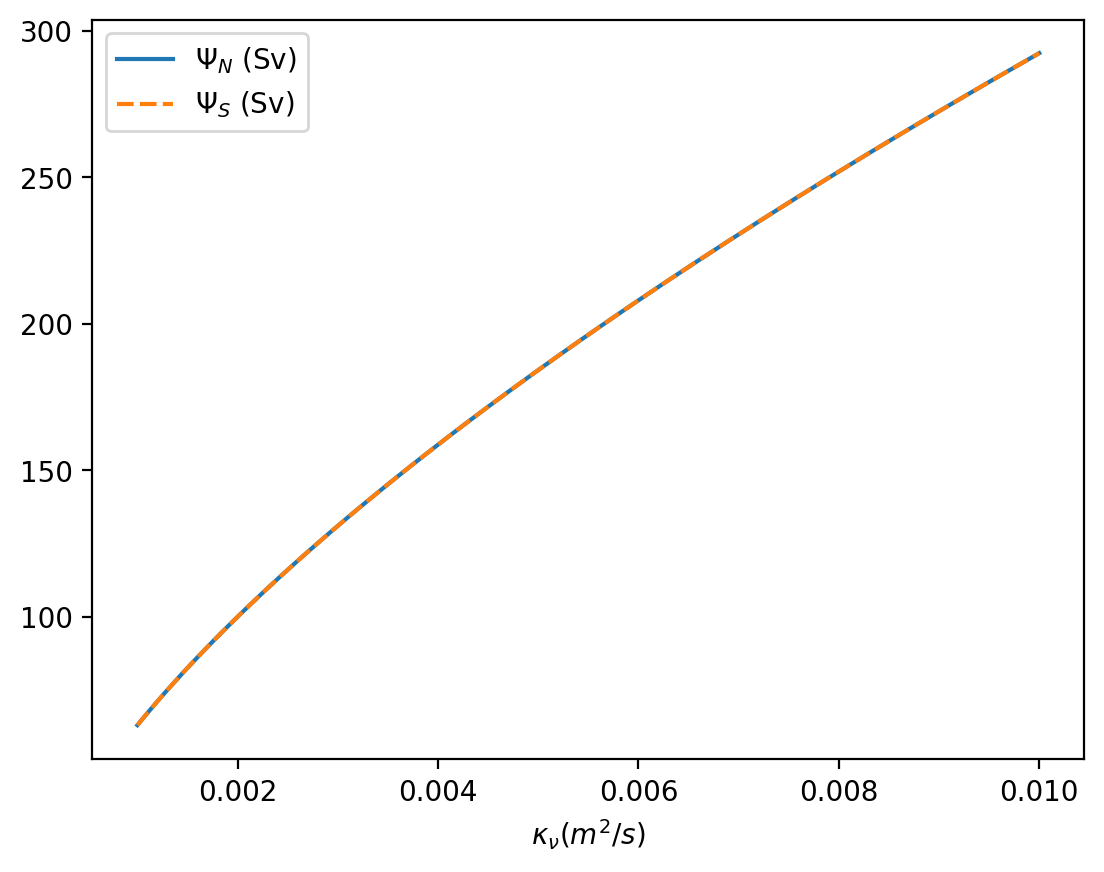

In [15]:
Kvs = np.geomspace(1e-3, 1e-2)
hs = h_strong(Kvs)
data = pd.DataFrame.from_dict(
    {
        r"$\kappa_\nu(m^2/s)$": Kvs,
        r"$\Psi_N$ (Sv)": PsiN(hs) / 1e6,
        r"$\Psi_S$ (Sv)": PsiS(hs, Kvs) / 1e6,
    }
)
data.set_index(data.columns[0], inplace=True)
sns.lineplot(data=data)

For strong diffusivity ($\kappa_\nu$), the northern sinking and sourthern upwelling / sinking are in near balance.